# Linear Discriminant Analysis

## Math

### within class scatter matrix $S_W$

$S_W = \sum{c} S_c$

$S_c = \sum_{i \in  c}^{}(x_i - \bar{x_c}) \cdot (x_i - \bar{x_c}) ^T$

i 代表feature

meaning: 每個class 裡每個feature 與feature's mean 之間的距離

### Between class scatter matrix

$S_B = \sum_{ c}^{} n_c (\bar{x_c} -\bar{x}) \cdot (\bar{x_c} -\bar{x}) ^T$

then need the eigenvalue

$S_W^{-1} - S_B$

In [1]:
import numpy as np

In [ ]:
# do Linear Discriminant Analysis by hand
import numpy as np

class LdaByHand():
    def __init__(self, n_components) -> None:
        """
        n_components: how many components to retain at last
        """
        self.n_components = n_components
        self.linear_discriminats = None # some eigenvector to transform X 

    # SW = scattered matrix within class
    # SB = scattered matrix between classes
    def fit (self, X, y):
        """
            calculate SW, SB, hence get the LD
        """
        pass

    def transform(self, X):
        """
        transformm X by LDb (get new features to project (??))

        """
        pass

In [6]:
# from source code online

import numpy as np


class MyLDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        self.class_means = None
        self.classes = None

        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        self.classes = class_labels

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

        # Calculate class means in the projected space
        self.class_means = {}
        for c in class_labels:
            X_c = X[y == c]
            self.class_means[c] = np.mean(self.transform(X_c), axis=0)

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)
    
    def predict(self, X):
        # Project the data
        X_projected = self.transform(X)
        # Assign each sample to the nearest class mean
        predictions = []
        for x in X_projected:
            distances = [np.linalg.norm(x - self.class_means[c]) for c in self.classes]
            predictions.append(self.classes[np.argmin(distances)])
        return np.array(predictions)




Shape of X: (150, 4)
Shape of transformed X: (150, 2)


C:\Users\user\AppData\Local\Temp\ipykernel_15064\4224029990.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


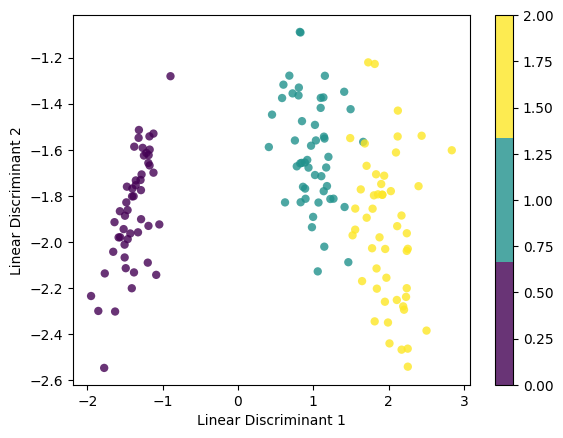

In [6]:
# Testing

# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

# Project the data onto the 2 primary linear discriminants
lda = MyLDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

Shape of X: (150, 4)
Shape of transformed X: (150, 2)
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


C:\Users\user\AppData\Local\Temp\ipykernel_18100\2323923753.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
c:\Users\user\.conda\envs\ml\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\user\.conda\envs\ml\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


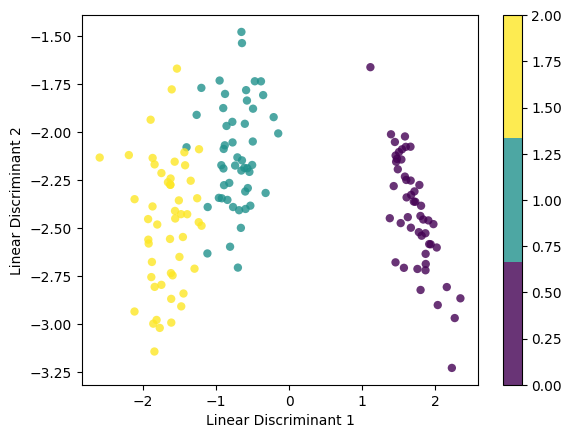

In [7]:
# driver code 2 (calculate how good is LD)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


data = datasets.load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Project the data onto the 2 primary linear discriminants
lda = MyLDA(2)
lda.fit(X_train, y_train)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

y_pred = lda.predict(X_test)
# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the projected data
x1, x2 = X_projected[:, 0], X_projected[:, 1]
plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()